In [1]:
import sys
sys.path.append('..')

from wxdata.utils import find_latlon
import pandas as pd
from wxdata import stormevents

In [2]:
%env WORKDIR ~/Documents/weatherpy-work

env: WORKDIR=~/Documents/weatherpy-work


In [3]:
chase_bdys_ne = [
    (49, -96.8),
    'Thief River Falls, MN',
    'Fergus Falls, MN',
    'Minneapolis, MN',
    'Rochester, MN',
    'Iowa City, IA',
    'Unionville, MO',
    'Sedalia, MO',
    'Nevada, MO',
    'Springfield, MO',
]

chase_bdys_se = [
    # 'Springfield, MO',
    'Tulsa, OK',
    'Stroud, OK',
    'Durant, OK',
    'Paris, TX',
    'Athens, TX',
    'Waco, TX',
    'San Angelo, TX'
]

chase_bdys_sw = [
    #'San Angelo, TX',
    'Monahans, TX',
    'Carlsbad, NM',
    'Roswell, NM',
    'Santa Rosa, NM',
    'Des Moines, NM',
    'Pueblo, CO',
    'Denver, CO'
]

chase_bdys_nw = [
    # 'Denver, CO',
    'Orin, WY',
    'Buffalo Gap, SD',
    'Rapid City, SD',
    'Sturgis, SD',
    'Broadus, MT',
    'Miles City, MT',
    'Roundup, MT',
    (49, -108.5) # MT- Canada border
]

In [4]:
chase_bdys = chase_bdys_nw + chase_bdys_ne + chase_bdys_se + chase_bdys_sw

from collections import OrderedDict
chase_bdy_coords = OrderedDict()

for city in chase_bdys:
    if not isinstance(city, tuple):
        lat, lon = find_latlon(city)
    else:
        lat, lon = city
    chase_bdy_coords[city]= (lat, lon)

In [5]:
chase_bdy_coords

OrderedDict([('Orin, WY', (42.6533015, -105.1924778)),
             ('Buffalo Gap, SD', (43.4916502, -103.312975)),
             ('Rapid City, SD', (44.0805434, -103.2310149)),
             ('Sturgis, SD', (44.4097069, -103.5090786)),
             ('Broadus, MT', (45.4438809, -105.4074903)),
             ('Miles City, MT', (46.4083362, -105.8405582)),
             ('Roundup, MT', (46.445242, -108.5417999)),
             ((49, -108.5), (49, -108.5)),
             ((49, -96.8), (49, -96.8)),
             ('Thief River Falls, MN', (48.1191353, -96.18114729999999)),
             ('Fergus Falls, MN', (46.2835212, -96.0777887)),
             ('Minneapolis, MN', (44.977753, -93.2650108)),
             ('Rochester, MN', (44.0121221, -92.4801989)),
             ('Iowa City, IA', (41.6611277, -91.5301683)),
             ('Unionville, MO', (40.4769606, -93.0032614)),
             ('Sedalia, MO', (38.7044609, -93.2282613)),
             ('Nevada, MO', (37.83920519999999, -94.3546719)),
           

In [6]:
import numpy as np
coords = list(chase_bdy_coords.values())
coords.append(coords[0])
arr = np.array(coords)

In [7]:
arr[:, 0]

array([42.6533015, 43.4916502, 44.0805434, 44.4097069, 45.4438809,
       46.4083362, 46.445242 , 49.       , 49.       , 48.1191353,
       46.2835212, 44.977753 , 44.0121221, 41.6611277, 40.4769606,
       38.7044609, 37.8392052, 37.2166779, 36.1556805, 35.7486798,
       33.9924186, 33.6609389, 32.2048735, 31.549333 , 31.4637723,
       31.5942991, 32.4206736, 33.3942655, 34.93867  , 36.7611356,
       38.2544472, 39.7392358, 42.6533015])

In [8]:
from shapely.geometry import MultiPoint, Polygon, Point

chasepoly = Polygon(coords)

In [9]:
from wxdata.plotting import simple_basemap
%matplotlib inline
import matplotlib.pyplot as plt

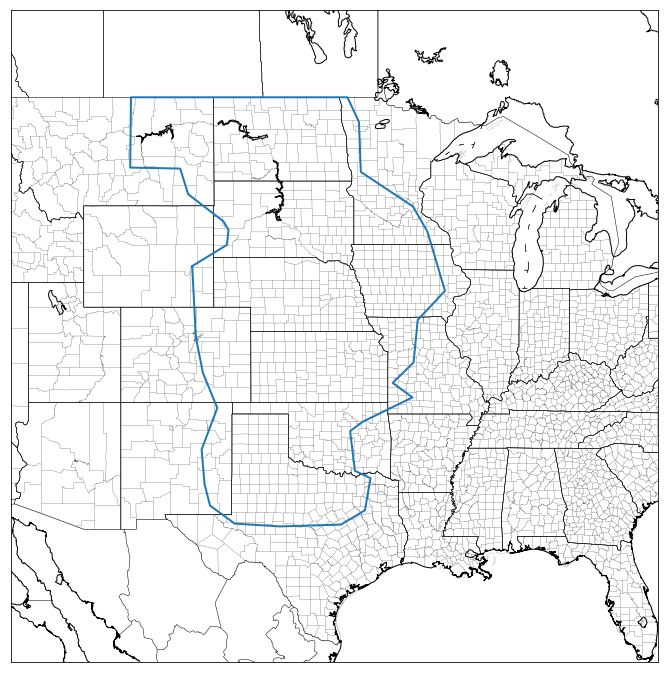

In [10]:
fig = plt.figure(figsize=(12, 12))
m = simple_basemap(bbox=(-115, -80, 25, 52), proj='merc', 
                   draw=('coastlines', 'countries', 'states', 'counties'))
m.plot(arr[:, 1], arr[:, 0], latlon=True, linewidth=2)

In [11]:
okc = Point(*find_latlon('Oklahoma City, OK'))
rapidcity = Point(*find_latlon('Rapid City, SD'))
stl = Point(*find_latlon('St. Louis, MO'))

In [12]:
(chasepoly.contains(okc),
chasepoly.contains(rapidcity),
chasepoly.contains(stl))

(True, False, False)

In [13]:
chase_states = ['Montana', 'North Dakota', 'South Dakota', 'Minnesota', 'Iowa',
                'Wyoming', 'Nebraska', 'Colorado', 'Kansas', 'Missouri', 'New Mexico',
                'Texas', 'Oklahoma']

In [14]:
df = stormevents.tornadoes('1996-01-01 00:00', '2017-12-31 23:59', tz='CST', 
                          states=chase_states, hours=range(12, 24), months=['April', 'May', 'June'])

/Users/jitang/anaconda/envs/gpdenv/lib/python3.6/multiprocessing/pool.py:44: DtypeWarning: Columns (26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  return list(map(*args))
/Users/jitang/anaconda/envs/gpdenv/lib/python3.6/multiprocessing/pool.py:44: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  return list(map(*args))
/Users/jitang/anaconda/envs/gpdenv/lib/python3.6/multiprocessing/pool.py:44: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  return list(map(*args))
/Users/jitang/anaconda/envs/gpdenv/lib/python3.6/multiprocessing/pool.py:44: DtypeWarning: Columns (29,34,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  return list(map(*args))


In [15]:
from wxdata.stormevents import tors
from wxdata.stormevents import filter_region

chaseabletors = filter_region(df, chasepoly)
chaseable_corr = tors.correct_tornado_times(chaseabletors)

In [27]:
chaseable_corr[abs(chaseable_corr.end_lat - chaseable_corr.begin_lat) > 0.35]

,begin_yearmonth,begin_day,begin_time,end_yearmonth,end_day,end_time,episode_id,event_id,state,state_fips,...,end_range,end_azimuth,end_location,begin_lat,begin_lon,end_lat,end_lon,episode_narrative,event_narrative,data_source
670,199805,15,1330,199805,15,1410,2077274,5645775,IOWA,19.0,...,5.0,NE,LEDYARD,43.0200,-94.2300,43.4700,-94.1000,As the system mentioned above continued to evo...,Intermittent track,PDC
1060,199905,31,1850,199905,31,1855,2408797,5702521,KANSAS,20.0,...,3.0,S,PROTECTION,37.1700,-99.5000,35.1500,-99.4800,NaN,Mature cottonwood grove taken out.,PDC
1336,199904,8,1625,199904,8,1645,1501291,5686948,IOWA,19.0,...,5.0,NE,HARTFORD,41.1500,-93.5200,41.5200,-93.3500,"As mentioned in the narrative above, an intens...",intermittent track,PDC
5128,200805,22,1731,200805,22,1819,17715,102978,KANSAS,20.0,...,6.0,NW,LYLE,39.6312,-100.4205,40.0019,-100.3116,A series of intense supercell thunderstorms mo...,An intense supercell thunderstorm produced thi...,CSV
5206,200805,23,1726,200805,23,1805,15805,90694,WYOMING,56.0,...,3.0,SW,YODER,41.5379,-104.2931,41.8893,-104.3413,For a second day in a row severe thunderstorms...,"Tornado moved primarily over open country, but...",CSV
8904,201704,29,1708,201704,29,1750,114098,683254,TEXAS,48.0,...,7.0,NNE,FRUITVALE,32.3991,-95.8756,32.7717,-95.7670,A deep low pressure system near the Four corne...,This tornado began nearly as the last tornado...,CSV


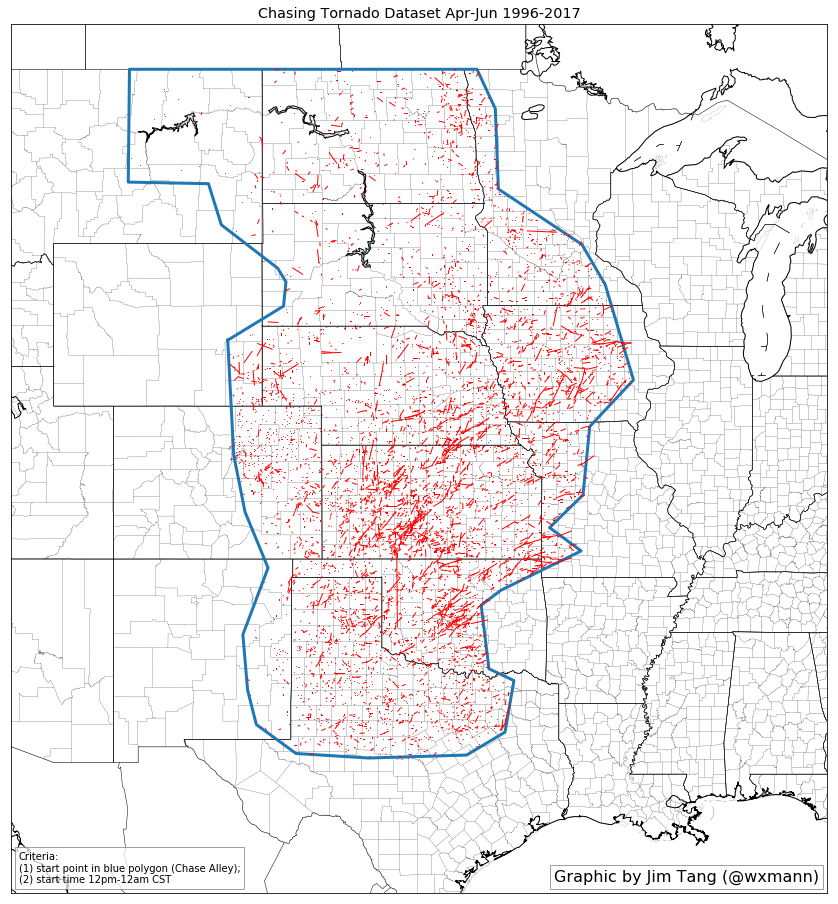

In [28]:
fig = plt.figure(figsize=(16, 16))
m = simple_basemap(bbox=(-112.5, -85, 27.5, 50), proj='merc', 
                   draw=('coastlines', 'countries', 'states', 'counties'))
m.plot(arr[:, 1], arr[:, 0], latlon=True, linewidth=3)
tors.plot_tornadoes(chaseable_corr, m, color='red', linewidth=1)

from wxdata.plotting import bottom_right_textbox, bottom_left_textbox
plt.title('Chasing Tornado Dataset Apr-Jun 1996-2017', fontsize='x-large')
bottom_left_textbox(plt.gca(), 'Criteria:\n(1) start point in blue polygon (Chase Alley);\n(2) start time 12pm-12am CST',
                   fontsize='medium')
bottom_right_textbox(plt.gca(), 'Graphic by Jim Tang (@wxmann)')